# Machine Learning: Lab 2
## Feature engineering
TA: Bryan Coulier (bryan.coulier@kuleuven.be)

features aanpassen aan de hand van wat je wil veranderen

In [92]:
# Import necessary libraries
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
from sklearn.preprocessing import StandardScaler


### Remove Constant Features
Remove all constant features from the random matrix with Scikit-learn and print the shape of the matrix

If Variance Threshold = 0 (Remove Constant Features )
If Variance Threshold > 0 (Remove Quasi-Constant Features )
http://medium.com/nerd-for-tech/removing-constant-variables-feature-selection-463e2d6a30d9

fit_transform(X) in VarianceThreshold berekent eerst de variantie van elke kolom (fit) en verwijdert vervolgens de kolommen met te lage variantie (transform). Hierdoor blijven alleen de relevante features over.


In [93]:
np.random.seed(1)
X_rand = np.random.randint(0, 100, (50, 10))
X_rand[:, [1,3,5]] = 100
X_rand[:5, :]
 
X_reduced = VarianceThreshold(threshold=0).fit_transform(X_rand)


### Remove Quasi-Constant Features
Scale the features in the Housing.csv data and remove all features with a variance < 0.1, print the removed features

inladen van de dataset

In [94]:
housing_data = pd.read_csv('Housing.csv')

Opschalen van de features 

de standaardscore wordt berekend aan de hand van :
'''
z = (x - u) / s
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.'''

In [95]:
scaler = StandardScaler(with_std=False)
scaled_data = scaler.fit_transform(housing_data)

Vergelijking tussen de normale data en de geschaalde data 

In [96]:
print(pd.DataFrame(scaled_data, columns=housing_data.columns).head())
print("-----------------")
print(housing_data.head())

   index      crim         zn     indus     chas       nox        rm  \
0 -252.5 -3.607204   6.636364 -8.826779 -0.06917 -0.016695  0.290366   
1 -251.5 -3.586214 -11.363636 -4.066779 -0.06917 -0.085695  0.136366   
2 -250.5 -3.586234 -11.363636 -4.066779 -0.06917 -0.085695  0.900366   
3 -249.5 -3.581154 -11.363636 -8.956779 -0.06917 -0.096695  0.713366   
4 -248.5 -3.544474 -11.363636 -8.956779 -0.06917 -0.096695  0.862366   

         age       dis       rad         tax   ptratio      black     lstat  \
0  -3.374901  0.294957 -8.549407 -112.237154 -3.155534  40.225968 -7.673063   
1  10.325099  1.172057 -7.549407 -166.237154 -0.655534  40.225968 -3.513063   
2  -7.474901  1.172057 -7.549407 -166.237154 -0.655534  36.155968 -8.623063   
3 -22.774901  2.267157 -6.549407 -186.237154  0.244466  37.955968 -9.713063   
4 -14.374901  2.267157 -6.549407 -186.237154  0.244466  40.225968 -7.323063   

        medv  
0   1.467194  
1  -0.932806  
2  12.167194  
3  10.867194  
4  13.667194  
--

In [97]:
selector = VarianceThreshold(threshold=0.1)
reduced_data = selector.fit_transform(scaled_data)

# ~ staat voor not 
removed_features = housing_data.columns[~selector.get_support()]  

print("Removed features:", removed_features)

Removed features: Index(['chas', 'nox'], dtype='object')


### Univariate Feature Selection
Univariate feature selection is a simple technique for reducing the dimensionality of the feature space by selecting only the most important features.

Read in breast cancer toydataset and split into features and target

In [98]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the breast cancer dataset
brcn = load_breast_cancer()

# Convert to DataFrame
target = brcn.target
features = brcn.data

print(target)
print (features)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Select the 3 features with the strongest relationship to the target

In [99]:
df = pd.DataFrame(features, columns=brcn.feature_names)
df["target"] = brcn.target
correlations = df.corr()["target"].abs().sort_values(ascending=False)

# Selecteer de top 3 features
top_features = correlations.index[1:4]
print(top_features)

Index(['worst concave points', 'worst perimeter', 'mean concave points'], dtype='object')


Select features based on top 30 percentile

In [100]:
from sklearn.feature_selection import SelectPercentile

# Select the top 30 percentile features
selector = SelectPercentile(score_func=f_classif, percentile=30)
selector.fit(features, target)

# Get the selected feature names
selected_features_percentile = brcn.feature_names[selector.get_support()]

Print out the names of the selected features that where selected based on the percentile

In [101]:
print("Selected features based on top 30 percentile:", selected_features_percentile)

Selected features based on top 30 percentile: ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concave points']


Read in toydataset diabetes and split into features and target

In [102]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Split into features and target
diabetes_features = diabetes.data
diabetes_target = diabetes.target

print(diabetes_features)
print(diabetes_target)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

Select features based on top 30 percentile and print out these features

In [103]:
from sklearn.feature_selection import f_classif

# Select the top 30 percentile features
selector = SelectPercentile(score_func=f_classif, percentile=30)
selector.fit(features, target)

# Get the selected feature names
selected_features_percentile = brcn.feature_names[selector.get_support()]

print("Selected features based on top 30 percentile:", selected_features_percentile)

Selected features based on top 30 percentile: ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concave points']


## Problem 1: Fruits feature engineering
Given a dataset containing information about the size and color of fruits, the task is to create new (more useful) features from the existing ones.

### Dataset
The dataset is a pandas dataframe with two columns:

- "Size": a continuous variable representing the size of the fruit.
- "Color": a categorical variable representing the color of the fruit.

### Task
1) Create a new feature "Size_Category" by grouping the "Size" column into 3 categories: Small, Medium, and Large. The criteria for grouping the values should be as follows:
    - Small: Size < 100
    - Medium: 100 <= Size < 200
    - Large: Size >= 200
2) Create a new feature "Color_Encoded" by encoding the "Color" column using one-hot encoding.
3) Print the first 5 rows of the dataframe to check if the new features have been created successfully.

Example output:
|Index  | Size  | Color   | Size_Category | Color_Encoded_Red | Color_Encoded_Green | Color_Encoded_Yellow |
|-------|-------|---------|---------------|------------------|------------------- |-------------------- |
| 0     |150    | Green   | Medium           | 0.0              | 1.0                | 0.0                 |
| 1     |250    | Red     | Large           | 1.0              | 0.0                | 0.0                 |
| 2     |180    | Yellow  | Medium           | 0.0              | 0.0                | 1.0                 |
| 3     |100    | Green   | Medium           | 0.0              | 1.0                | 0.0                 |
| 4     |200    | Red     | Large           | 1.0              | 0.0                | 0.0                 |
size aan de hand van one hot bij sml  
                                 010 


Note: use the following code to generate a sample dataframe for the task:
```Python
import pandas as pd
import numpy as np

np.random.seed(0)
data = {"Size": np.random.randint(50, 300, size=(100,)),"Color": np.random.choice(["Red", "Green", "Yellow"], size=(100,))}
df = pd.DataFrame(data)
```

In [5]:
import pandas as pd
import numpy as np

np.random.seed(0)
data = {"Size": np.random.randint(50, 300, size=(100,)),"Color": np.random.choice(["Red", "Green", "Yellow"], size=(100,))}
df = pd.DataFrame(data)

# 1) Create boolean columns for size categories
df['Small'] = df['Size'] < 100
df['Medium'] = (df['Size'] >= 100) & (df['Size'] < 200)
df['Large'] = df['Size'] >= 200

# 2) One-hot encode color with specified column names
color_dummies = pd.get_dummies(df['Color'], prefix='Color_Encoded')
df = pd.concat([df, color_dummies], axis=1)

# 3) Show first 5 rows with new features
print(df[['Size', 'Color', 'Small', 'Medium', 'Large'] + 
      df.filter(like='Color_Encoded').columns.tolist()].head())

   Size   Color  Small  Medium  Large  Color_Encoded_Green  Color_Encoded_Red  \
0   222     Red  False   False   True                False               True   
1    97  Yellow   True   False  False                False              False   
2   167     Red  False    True  False                False               True   
3   242     Red  False   False   True                False               True   
4   117     Red  False    True  False                False               True   

   Color_Encoded_Yellow  
0                 False  
1                  True  
2                 False  
3                 False  
4                 False  


## Problem 2: Housing dataset feature selection

Using the Household.csv dataset:
1. Select important features using 2 different feature selection methods of your choice
2. Explain how each feature selection method works
3. Train linear regression models on each feature subset and compare performance
4. Train a lasso regression model and compare with the other models
5. Analyse the impact of the alpha parameter on the performance of the lasso regression model. Explain the results. How is feature selection performed in lasso regularization?

biassed regressie om bepaalde dingen eruit laten , zodat de rechte beter ligt
normaal geizen afstand ten opzichte van de gefitte lijn hebben en je voegt een bias toe 
hoeveel elke feature 
alfa 0 : normale regressie 
alfa oneidig alle features eruit smijten 

   index     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0      1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1      2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2      3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3      4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4      5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Model Performance Comparison:
Pearson: R² = 0.568, RMSE = 5.674
RFE: R² = 0.695, RMSE = 4.765
Lasso: R² = 0.693, RMSE = 4.780


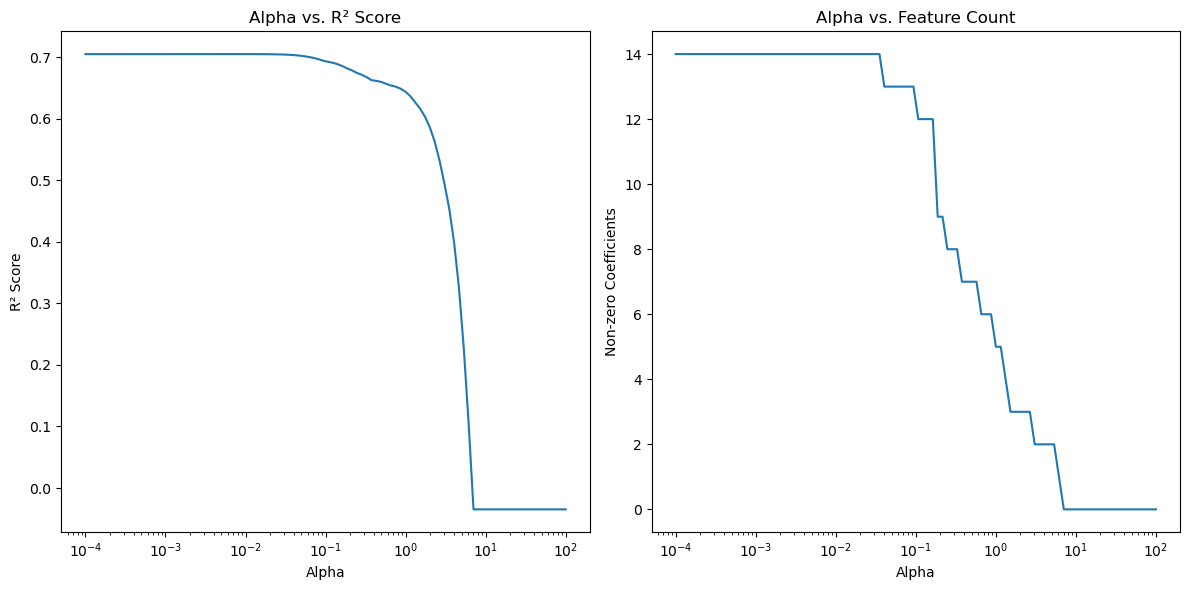

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Housing.csv')
print(data.head())
X = data.drop('medv', axis=1)  # Adjust target column name if needed
y = data['medv']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Method 1: Pearson Correlation (top 5 features)
correlations = X_train_scaled.corrwith(y_train).abs()
selected_pearson = correlations.nlargest(5).index.tolist()

# Method 2: RFE (top 5 features)
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)
selected_rfe = X_train_scaled.columns[rfe.support_]

# Train models
# Model 1: Pearson
model_pearson = LinearRegression()
model_pearson.fit(X_train_scaled[selected_pearson], y_train)
y_pred_pearson = model_pearson.predict(X_test_scaled[selected_pearson])

# Model 2: RFE
model_rfe = LinearRegression()
model_rfe.fit(X_train_scaled[selected_rfe], y_train)
y_pred_rfe = model_rfe.predict(X_test_scaled[selected_rfe])

# Model 3: Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Compare performance
results = {
    'Pearson': {
        'R²': r2_score(y_test, y_pred_pearson),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_pearson))
    },
    'RFE': {
        'R²': r2_score(y_test, y_pred_rfe),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rfe))
    },
    'Lasso': {
        'R²': r2_score(y_test, y_pred_lasso),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    }
}

print("Model Performance Comparison:")
for method, metrics in results.items():
    print(f"{method}: R² = {metrics['R²']:.3f}, RMSE = {metrics['RMSE']:.3f}")

# Analyze Lasso's alpha
alphas = np.logspace(-4, 2, 100)
r2_scores = []
non_zero_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    r2_scores.append(r2_score(y_test, y_pred))
    non_zero_coefs.append(np.sum(lasso.coef_ != 0))

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.semilogx(alphas, r2_scores)
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Alpha vs. R² Score')

plt.subplot(1, 2, 2)
plt.semilogx(alphas, non_zero_coefs)
plt.xlabel('Alpha')
plt.ylabel('Non-zero Coefficients')
plt.title('Alpha vs. Feature Count')
plt.tight_layout()
plt.show()